## 县级

In [2]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure,scatter,show

%matplotlib inline


ERROR 1: PROJ: proj_create_from_database: Open of /home/haoying/anaconda3/envs/torch/share/proj failed
PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
import pandas as pd
cp = pd.read_csv('/home/haoying/res_zl12/center2PA.csv')
df = pd.read_csv('/home/haoying/res_zl12_effnet_v3/nightlight_predicted_all.csv')
df.columns = ['name','cluster_lat','cluster_lon','nightlights','predict']
df1 = pd.merge(df,cp,how='left')

In [4]:
score = df1.groupby('PAC').agg({'predict':'mean','name':'count','nightlights':'mean'})
score = pd.DataFrame(score).reset_index()
score.columns = ['PAC','predict','pic_num','nightlights']
score

,PAC,predict,pic_num,nightlights
0,110102,6.000537,1,44.620304
1,110105,6.000586,2,22.427105
2,110108,5.716405,9,24.567962
3,110109,4.289772,18,0.534067
4,110111,4.766587,26,2.473657
...,...,...,...,...
2619,659007,4.529892,11,0.764995
2620,659008,4.777022,4,0.505605
2621,659009,4.342645,12,0.469621
2622,659010,4.738519,15,0.735890


In [5]:
import geopandas
import json

county_shp = geopandas.GeoDataFrame.from_file('/home/haoying/data/get_shp/县级行政区/县级行政区.shp')
county_shp['ID'] = [i for i in range(county_shp.shape[0])]
county_shp['parent'] = county_shp['parent'].apply(lambda x:json.loads(x).get('adcode'))
county_shp['adcode'] = county_shp['adcode'].astype(str)
county_shp.head()

,adcode,name,childrenNu,level,parent,subFeature,geometry,ID
0,110101,东城区,0,district,110000,NaN,"POLYGON ((116.44364 39.87285, 116.44351 39.872...",0
1,110102,西城区,0,district,110000,NaN,"POLYGON ((116.32581 39.89679, 116.32581 39.897...",1
2,110105,朝阳区,0,district,110000,NaN,"MULTIPOLYGON (((116.59555 40.01752, 116.59820 ...",2
3,110106,丰台区,0,district,110000,NaN,"POLYGON ((116.25909 39.89667, 116.26005 39.896...",3
4,110107,石景山区,0,district,110000,NaN,"POLYGON ((116.16703 39.88876, 116.16636 39.889...",4


In [6]:
res = county_shp.set_index('adcode').join(score.set_index('PAC'))

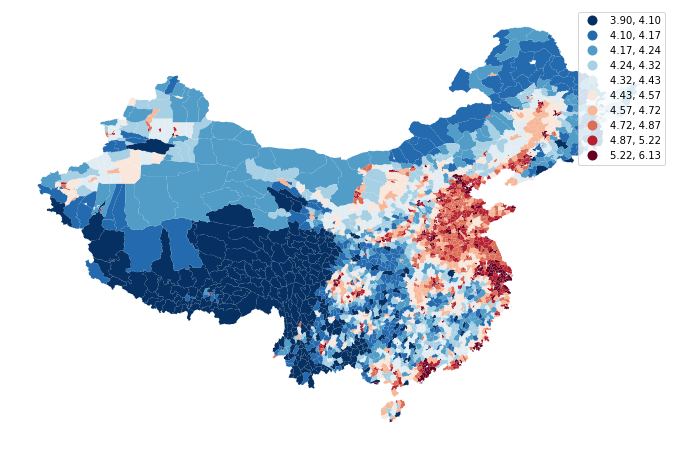

In [7]:
ax=res.plot(figsize=(12,8),column="predict",scheme='Quantiles', k=10, cmap='RdBu_r', legend=True)
ax.set_axis_off()

In [10]:
df = res
wq = lps.weights.Queen.from_dataframe(df)# 使用Quuen式邻接矩阵
wq.transform = 'r'
# 标准化矩阵

('WARNING: ', 439, ' is an island (no neighbors)')
('WARNING: ', 698, ' is an island (no neighbors)')
('WARNING: ', 716, ' is an island (no neighbors)')
('WARNING: ', 882, ' is an island (no neighbors)')
('WARNING: ', 883, ' is an island (no neighbors)')
('WARNING: ', 1049, ' is an island (no neighbors)')
('WARNING: ', 1747, ' is an island (no neighbors)')
('WARNING: ', 1951, ' is an island (no neighbors)')
('WARNING: ', 1952, ' is an island (no neighbors)')
('WARNING: ', 2596, ' is an island (no neighbors)')
('WARNING: ', 2750, ' is an island (no neighbors)')
('WARNING: ', 2814, ' is an island (no neighbors)')
('WARNING: ', 2838, ' is an island (no neighbors)')
('WARNING: ', 2839, ' is an island (no neighbors)')
('WARNING: ', 2840, ' is an island (no neighbors)')
('WARNING: ', 2841, ' is an island (no neighbors)')
('WARNING: ', 2842, ' is an island (no neighbors)')
('WARNING: ', 2843, ' is an island (no neighbors)')
('WARNING: ', 2845, ' is an island (no neighbors)')
('WARNING: ', 284

/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 115 disconnected components.
 There are 21 islands with ids: 439, 698, 716, 882, 883, 1049, 1747, 1951, 1952, 2596, 2750, 2814, 2838, 2839, 2840, 2841, 2842, 2843, 2845, 2846, 2847.
  warnings.warn(message)


In [11]:
res1 = res[pd.notnull(res['predict'])]
df = res1
wq = lps.weights.Queen.from_dataframe(df)# 使用Quuen式邻接矩阵
wq.transform = 'r'
# 标准化矩阵

('WARNING: ', 656, ' is an island (no neighbors)')
('WARNING: ', 922, ' is an island (no neighbors)')
('WARNING: ', 1564, ' is an island (no neighbors)')
('WARNING: ', 1565, ' is an island (no neighbors)')
('WARNING: ', 1569, ' is an island (no neighbors)')
('WARNING: ', 2375, ' is an island (no neighbors)')
('WARNING: ', 2525, ' is an island (no neighbors)')
('WARNING: ', 2589, ' is an island (no neighbors)')
('WARNING: ', 2613, ' is an island (no neighbors)')
('WARNING: ', 2614, ' is an island (no neighbors)')
('WARNING: ', 2615, ' is an island (no neighbors)')
('WARNING: ', 2616, ' is an island (no neighbors)')
('WARNING: ', 2617, ' is an island (no neighbors)')
('WARNING: ', 2618, ' is an island (no neighbors)')
('WARNING: ', 2620, ' is an island (no neighbors)')
('WARNING: ', 2621, ' is an island (no neighbors)')
('WARNING: ', 2622, ' is an island (no neighbors)')


/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 110 disconnected components.
 There are 17 islands with ids: 656, 922, 1564, 1565, 1569, 2375, 2525, 2589, 2613, 2614, 2615, 2616, 2617, 2618, 2620, 2621, 2622.
  warnings.warn(message)


In [12]:
y = res1["predict"]
mi = esda.moran.Moran(y,wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


Moran's I 值为： 0.6633281233042605
随机分布假设下Z检验值为： 42.19433134146417
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 42.1830489601758
正态分布假设下Z检验的P值为： 0.0


In [13]:
y = res1["nightlights"]
mi = esda.moran.Moran(y,wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.46027434361384906
随机分布假设下Z检验值为： 29.447565303365725
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 29.277662822000366
正态分布假设下Z检验的P值为： 0.0


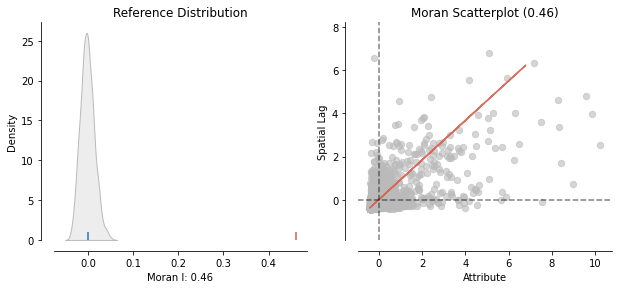

In [14]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [15]:
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.esda import moran_scatterplot

In [16]:
y = res1['predict'].values
w = lps.weights.distance.Kernel.from_dataframe(res1, fixed=False, k=15)
w.transform = 'r'

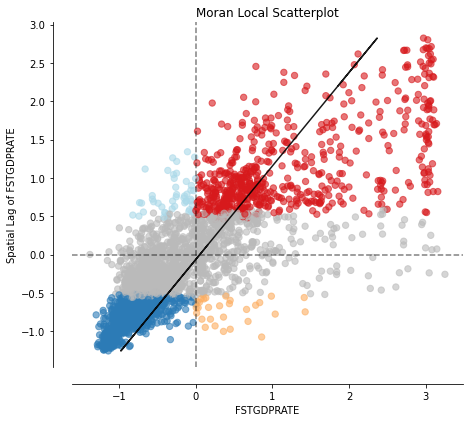

In [17]:
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('FSTGDPRATE')
ax.set_ylabel('Spatial Lag of FSTGDPRATE')
plt.show()

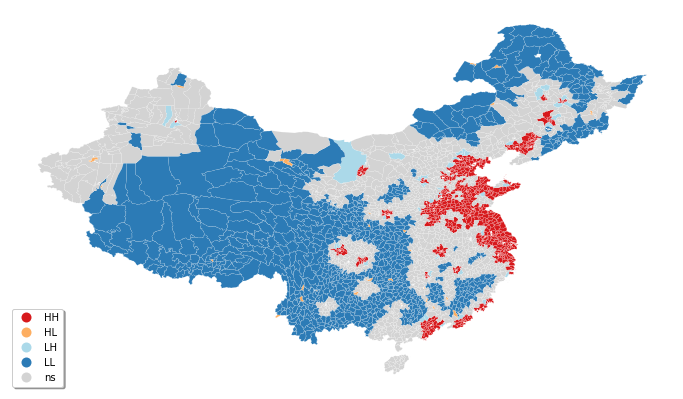

In [23]:
lisa_cluster(moran_loc, res1, p=0.05, figsize = (12,12),legend=True,legend_kwds={'loc': 'lower left', 'shadow': True })
plt.show()

In [217]:
from splot._viz_utils import mask_local_auto
_, colors5, _, labels = mask_local_auto(moran_loc, p=0.05)

In [218]:
res1['label'] = labels

/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [232]:
len(res1[res1['label']!='ns'])/len(res1)

0.5726267632481891

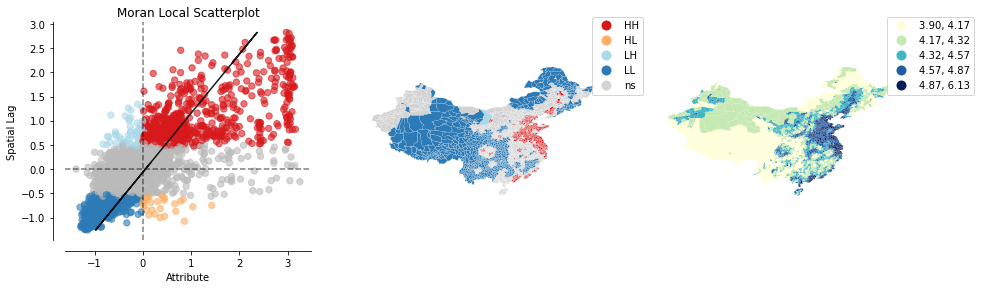

In [156]:
plot_local_autocorrelation(moran_loc, res1, 'predict')
plt.show()

In [24]:
## 省级
prov_shp = geopandas.GeoDataFrame.from_file('/home/haoying/data/get_shp/省级行政区/省级行政区.shp')
prov_shp['ID'] = [i for i in range(prov_shp.shape[0])]
# prov_shp['parent'] = county_shp['parent'].apply(lambda x:json.loads(x).get('adcode'))
prov_shp['adcode'] = prov_shp['adcode'].astype(str)
prov_shp.head()

,adcode,name,childrenNu,level,parent,subFeature,adchar,geometry,ID
0,110000,北京市,16.0,province,"{""adcode"": 100000}",0.0,None,"POLYGON ((117.34861 40.58114, 117.34861 40.581...",0
1,120000,天津市,16.0,province,"{""adcode"": 100000}",1.0,None,"MULTIPOLYGON (((117.76560 39.40053, 117.69970 ...",1
2,130000,河北省,11.0,province,"{""adcode"": 100000}",2.0,None,"MULTIPOLYGON (((117.46749 40.64974, 117.46749 ...",2
3,140000,山西省,11.0,province,"{""adcode"": 100000}",3.0,None,"POLYGON ((110.37926 34.60061, 110.29549 34.610...",3
4,150000,内蒙古自治区,12.0,province,"{""adcode"": 100000}",4.0,None,"POLYGON ((97.17290 42.79526, 97.28254 42.78208...",4


In [25]:
res = res.reset_index()
res['prov'] = res['adcode'].apply(lambda x:x[:2]+'0000')

In [26]:
prov_res = res.groupby('prov').agg({'predict':'mean','nightlights':'mean'}).reset_index()
prov_res1 = prov_shp.set_index('adcode').join(prov_res.set_index('prov'))

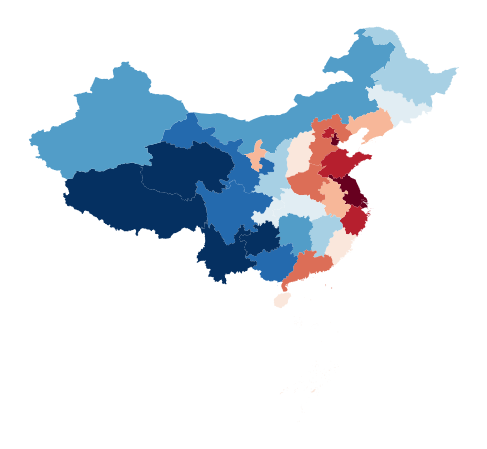

In [27]:
ax = prov_res1.plot(figsize=(12,8),column="predict",scheme='Quantiles', k=10, cmap='RdBu_r')
ax.set_axis_off()

In [28]:
prov_res2 = prov_res1[pd.notnull(prov_res1['predict'])]
df = prov_res2
wq = lps.weights.Queen.from_dataframe(df)# 使用Quuen式邻接矩阵
wq.transform = 'r'
# 标准化矩阵

('WARNING: ', 20, ' is an island (no neighbors)')


/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 20.
  warnings.warn(message)


In [29]:
y = prov_res2["predict"]
mi = esda.moran.Moran(y,wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.6013964773768855
随机分布假设下Z检验值为： 5.603408734510808
随机分布假设下Z检验的P值为： 2.1017680484902712e-08
正态分布假设下Z检验值为： 5.431665349853828
正态分布假设下Z检验的P值为： 5.5830549738900004e-08


In [30]:
y = prov_res2["nightlights"]
mi = esda.moran.Moran(y,wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.3346432783911216
随机分布假设下Z检验值为： 3.924558929048426
随机分布假设下Z检验的P值为： 8.68887886373848e-05
正态分布假设下Z检验值为： 3.1489395609509843
正态分布假设下Z检验的P值为： 0.0016386408150712573


In [31]:
mi

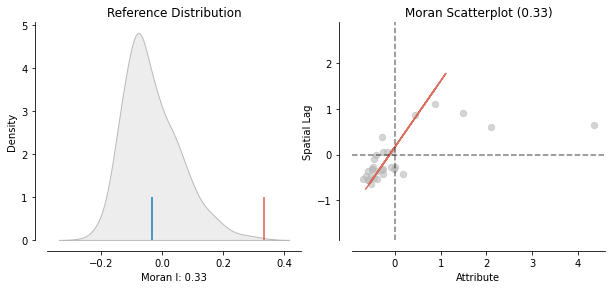

In [32]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [33]:
y = prov_res2['predict'].values
w = lps.weights.distance.Kernel.from_dataframe(prov_res2, fixed=False, k=15)
w.transform = 'r'

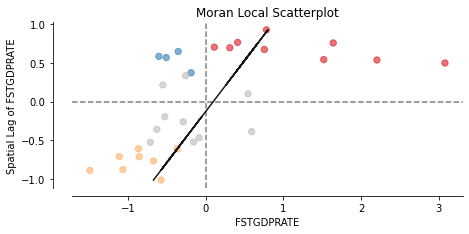

In [34]:
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('FSTGDPRATE')
ax.set_ylabel('Spatial Lag of FSTGDPRATE')
plt.show()

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>)

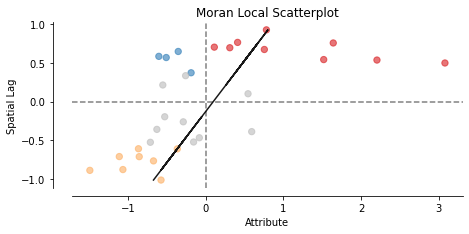

In [35]:
moran_scatterplot(moran_loc, p=0.05)

In [36]:
from splot._viz_utils import mask_local_auto
_, colors5, _, labels = mask_local_auto(moran_loc, p=0.05)

In [37]:
prov_res2['label']=labels
len(prov_res2[prov_res2['label'] !='ns'])/len(prov_res2)

/home/haoying/anaconda3/envs/torch/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


0.6774193548387096

In [38]:
prov_res2[prov_res2['label'] =='LL']

,name,childrenNu,level,parent,subFeature,adchar,geometry,ID,predict,nightlights,label
adcode,,,,,,,,,,,
500000,重庆市,38.0,province,"{""adcode"": 100000}",21.0,None,"MULTIPOLYGON (((106.37442 28.52574, 106.33192 ...",21,4.493376,2.130082,LL
510000,四川省,21.0,province,"{""adcode"": 100000}",22.0,None,"MULTIPOLYGON (((101.16788 27.19831, 101.16788 ...",22,4.373099,1.599525,LL
520000,贵州省,9.0,province,"{""adcode"": 100000}",23.0,None,"MULTIPOLYGON (((109.27426 28.49471, 109.26071 ...",23,4.297166,1.033951,LL
530000,云南省,16.0,province,"{""adcode"": 100000}",24.0,None,"POLYGON ((105.30823 27.70496, 105.29591 27.631...",24,4.200256,0.839065,LL
540000,西藏自治区,7.0,province,"{""adcode"": 100000}",25.0,None,"POLYGON ((89.71141 36.09327, 89.68862 36.09134...",25,4.051515,0.391942,LL
620000,甘肃省,14.0,province,"{""adcode"": 100000}",27.0,None,"MULTIPOLYGON (((106.50623 35.73751, 106.56659 ...",27,4.300958,0.648206,LL
630000,青海省,8.0,province,"{""adcode"": 100000}",28.0,None,"POLYGON ((102.82969 36.36554, 102.83647 36.344...",28,4.218538,0.813518,LL
650000,新疆维吾尔自治区,24.0,province,"{""adcode"": 100000}",30.0,None,"POLYGON ((96.38635 42.72759, 96.16646 42.62331...",30,4.411193,1.051441,LL


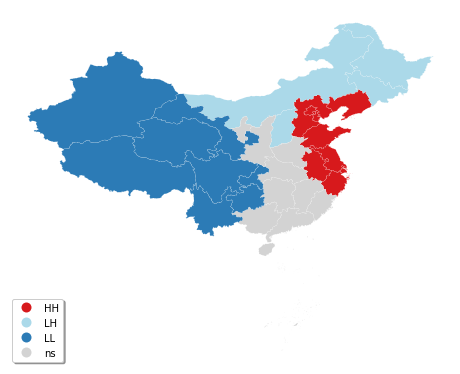

In [42]:
lisa_cluster(moran_loc, prov_res2, p=0.05, figsize = (8,9),legend=True,legend_kwds={'loc': 'lower left', 'shadow': True })
plt.show()